<a href="https://colab.research.google.com/github/vrushikesh123/EXPAILAB-40/blob/main/lab%20assign-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1 Equation: y = 26.29 + 11.29x
Slope interpretation: Each extra ad increases orders by 11.29.
Intercept interpretation: With no ads, sales are expected to be 26.29.
Baseline (mean of y): 46.60

Q1 Table:
   Newspaper Ads (x)  Orders Received (y)  Predicted Orders  SHAP Value  \
0                  1                   35         37.571429   -9.028571   
1                  2                   48         48.857143    2.257143   
2                  3                   60         60.142857   13.542857   
3                  1                   40         37.571429   -9.028571   
4                  2                   50         48.857143    2.257143   

  Over/Under  
0       Over  
1       Over  
2       Over  
3      Under  
4      Under  


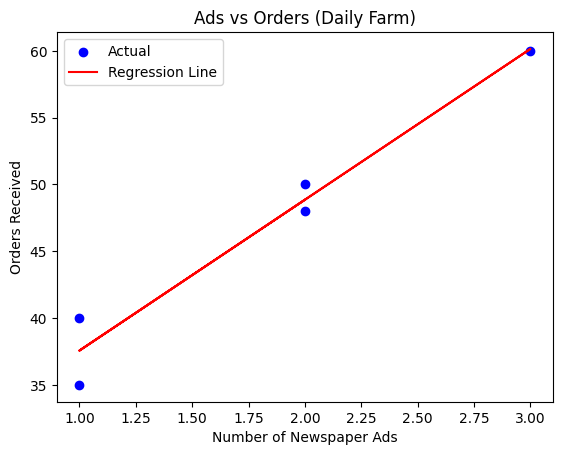

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Data: Number of newspaper ads and orders received
data_q1 = {
    'Newspaper Ads (x)': [1, 2, 3, 1, 2],
    'Orders Received (y)': [35, 48, 60, 40, 50]
}
df_q1 = pd.DataFrame(data_q1)
X_q1 = df_q1[['Newspaper Ads (x)']]
y_q1 = df_q1['Orders Received (y)']

# Fit linear regression model
model_q1 = LinearRegression()
model_q1.fit(X_q1, y_q1)

intercept_q1 = model_q1.intercept_
slope_q1 = model_q1.coef_[0]
print(f"Q1 Equation: y = {intercept_q1:.2f} + {slope_q1:.2f}x")

print(f"Slope interpretation: Each extra ad increases orders by {slope_q1:.2f}.")
print(f"Intercept interpretation: With no ads, sales are expected to be {intercept_q1:.2f}.")

# Predict for the dataset
preds_q1 = model_q1.predict(X_q1)

# Baseline (mean actual orders)
baseline_q1 = y_q1.mean()
print(f"Baseline (mean of y): {baseline_q1:.2f}")

# SHAP value for each row: pred - baseline
shap_q1 = preds_q1 - baseline_q1
df_q1['Predicted Orders'] = preds_q1
df_q1['SHAP Value'] = shap_q1
df_q1['Over/Under'] = np.where(preds_q1 > y_q1, 'Over', 'Under')

# Show table
print("\nQ1 Table:")
print(df_q1)

# Plot
plt.scatter(X_q1, y_q1, color='blue', label='Actual')
plt.plot(X_q1, preds_q1, color='red', label='Regression Line')
plt.xlabel('Number of Newspaper Ads')
plt.ylabel('Orders Received')
plt.title('Ads vs Orders (Daily Farm)')
plt.legend()
plt.show()

Q2 Equation: y = 16.61 + 3.35*x1 + 13.23*x2
Baseline (mean of y): 32.60

Q2 Table:
   Doctors Available (x1)  Reminders Sent (x2)  Appointments (y)  Predicted  \
0                       3                    1                40  39.903226   
1                       2                    1                35  36.548387   
2                       4                    0                30  30.032258   
3                       1                    0                20  19.967742   
4                       2                    1                38  36.548387   

   SHAP (Doctors)  SHAP (Reminders)  Total SHAP Over/Under  
0        2.012903          5.290323    7.303226      Under  
1       -1.341935          5.290323    3.948387       Over  
2        5.367742         -7.935484   -2.567742       Over  
3       -4.696774         -7.935484  -12.632258      Under  
4       -1.341935          5.290323    3.948387      Under  


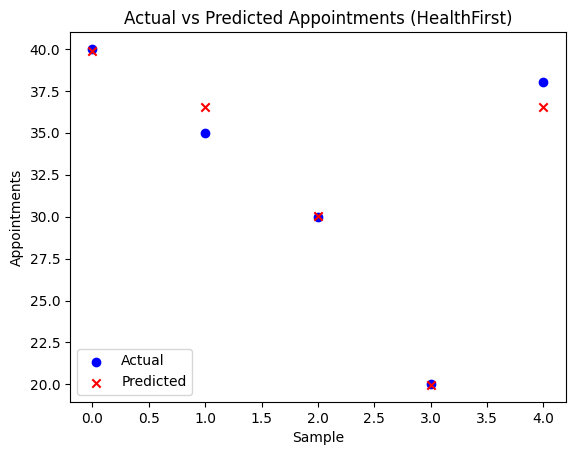

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Data: Doctors available, reminders sent, appointments
data_q2 = {
    'Doctors Available (x1)': [3, 2, 4, 1, 2],
    'Reminders Sent (x2)': [1, 1, 0, 0, 1],
    'Appointments (y)': [40, 35, 30, 20, 38]
}
df_q2 = pd.DataFrame(data_q2)
X_q2 = df_q2[['Doctors Available (x1)', 'Reminders Sent (x2)']]
y_q2 = df_q2['Appointments (y)']

# Fit model
model_q2 = LinearRegression()
model_q2.fit(X_q2, y_q2)
coefs_q2 = model_q2.coef_
intercept_q2 = model_q2.intercept_
print(f"Q2 Equation: y = {intercept_q2:.2f} + {coefs_q2[0]:.2f}*x1 + {coefs_q2[1]:.2f}*x2")

preds_q2 = model_q2.predict(X_q2)
baseline_q2 = y_q2.mean()
print(f"Baseline (mean of y): {baseline_q2:.2f}")

# SHAP values
doctors_mean = X_q2['Doctors Available (x1)'].mean()
reminders_mean = X_q2['Reminders Sent (x2)'].mean()
shap_doctors = coefs_q2[0] * (X_q2['Doctors Available (x1)'] - doctors_mean)
shap_reminders = coefs_q2[1] * (X_q2['Reminders Sent (x2)'] - reminders_mean)

df_q2['Predicted'] = preds_q2
df_q2['SHAP (Doctors)'] = shap_doctors
df_q2['SHAP (Reminders)'] = shap_reminders
df_q2['Total SHAP'] = shap_doctors + shap_reminders
df_q2['Over/Under'] = np.where(preds_q2 > y_q2, 'Over', 'Under')

# Show table
print("\nQ2 Table:")
print(df_q2)

# Plot
plt.scatter(np.arange(len(y_q2)), y_q2, color='blue', label='Actual')
plt.scatter(np.arange(len(preds_q2)), preds_q2, color='red', marker='x', label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Appointments')
plt.title('Actual vs Predicted Appointments (HealthFirst)')
plt.legend()
plt.show()

Baseline (training mean): 153.74
   Actual   Predicted    Baseline    Sum SHAP
0   219.0  139.547558  153.736544  -14.188986
1    70.0  179.517208  153.736544   25.780664
2   202.0  134.038756  153.736544  -19.697788
3   230.0  291.417029  153.736544  137.680485
4   111.0  123.789659  153.736544  -29.946885


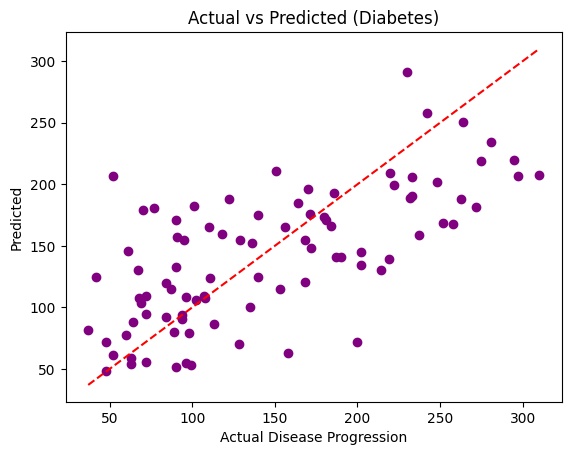

In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load data
diab = load_diabetes()
X = diab.data
y = diab.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_q3 = LinearRegression()
model_q3.fit(X_train, y_train)
coefs_q3 = model_q3.coef_
intercept_q3 = model_q3.intercept_

# Baseline
baseline_q3 = np.mean(y_train)
print(f"Baseline (training mean): {baseline_q3:.2f}")

# Predict/test
preds_q3 = model_q3.predict(X_test)

# SHAP manual per feature
X_train_mean = np.mean(X_train, axis=0)
shap_values_q3 = (X_test - X_train_mean) * coefs_q3

# Show for first 5 test samples
df_q3 = pd.DataFrame({
    'Actual': y_test[:5],
    'Predicted': preds_q3[:5],
    'Baseline': baseline_q3,
    'Sum SHAP': shap_values_q3[:5].sum(axis=1)
})
print(df_q3)

# Plot
plt.scatter(y_test, preds_q3, color='purple')
plt.xlabel('Actual Disease Progression')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (Diabetes)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  

Correlation matrix:
                                   Hours Studied  Previous Scores  Sleep Hours  \
Hours Studied                          1.000000        -0.012390     0.001245   
Previous Sc

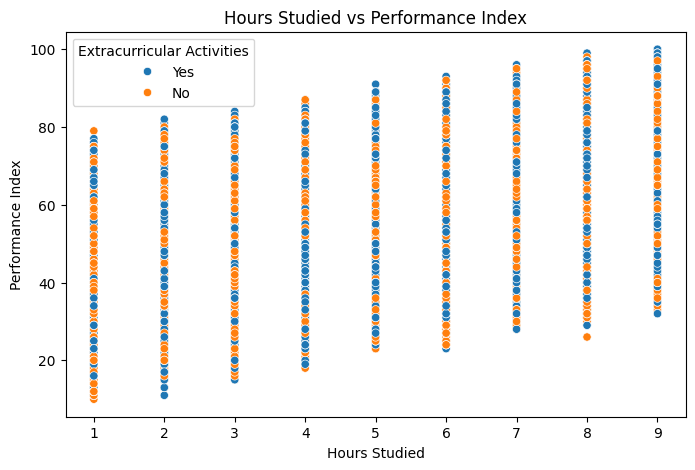

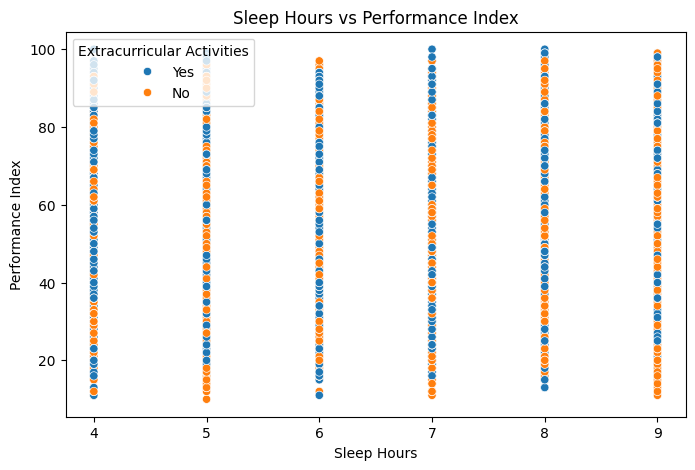

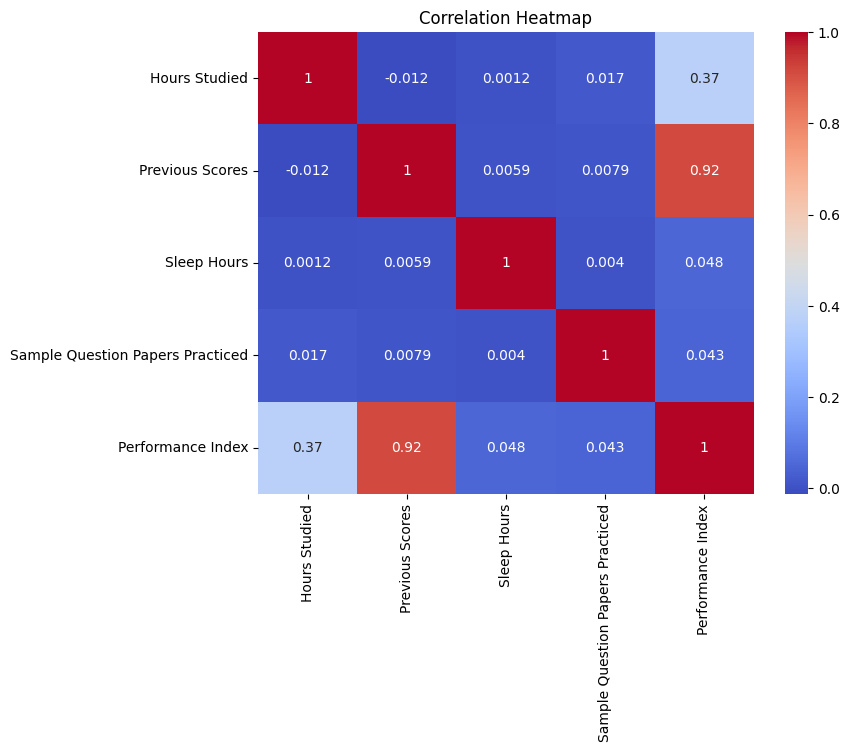


Regression Coefficients:
Intercept: 37.85665579575415
Hours Studied Coefficient: 2.7726226585534235
Sleep Hours Coefficient: 0.5397232309978358


In [4]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Student_Performance.csv")
print(df.head())
correlation = df.corr(numeric_only=True)
print("\nCorrelation matrix:\n", correlation)

plt.figure(figsize=(8,5))
sns.scatterplot(x='Hours Studied', y='Performance Index', data=df, hue='Extracurricular Activities')
plt.title('Hours Studied vs Performance Index')
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.legend(title='Extracurricular Activities')
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(x='Sleep Hours', y='Performance Index', data=df, hue='Extracurricular Activities')
plt.title('Sleep Hours vs Performance Index')
plt.xlabel('Sleep Hours')
plt.ylabel('Performance Index')
plt.legend(title='Extracurricular Activities')
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

from sklearn.linear_model import LinearRegression

# Choosing predictors
X = df[['Hours Studied', 'Sleep Hours']]
y = df['Performance Index']

# Fit model
model = LinearRegression()
model.fit(X, y)

print("\nRegression Coefficients:")
print(f"Intercept: {model.intercept_}")
print(f"Hours Studied Coefficient: {model.coef_[0]}")
print(f"Sleep Hours Coefficient: {model.coef_[1]}")